In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [35]:
df['date'] = pd.to_datetime(df['Date'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13424\3118866715.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['Date'])


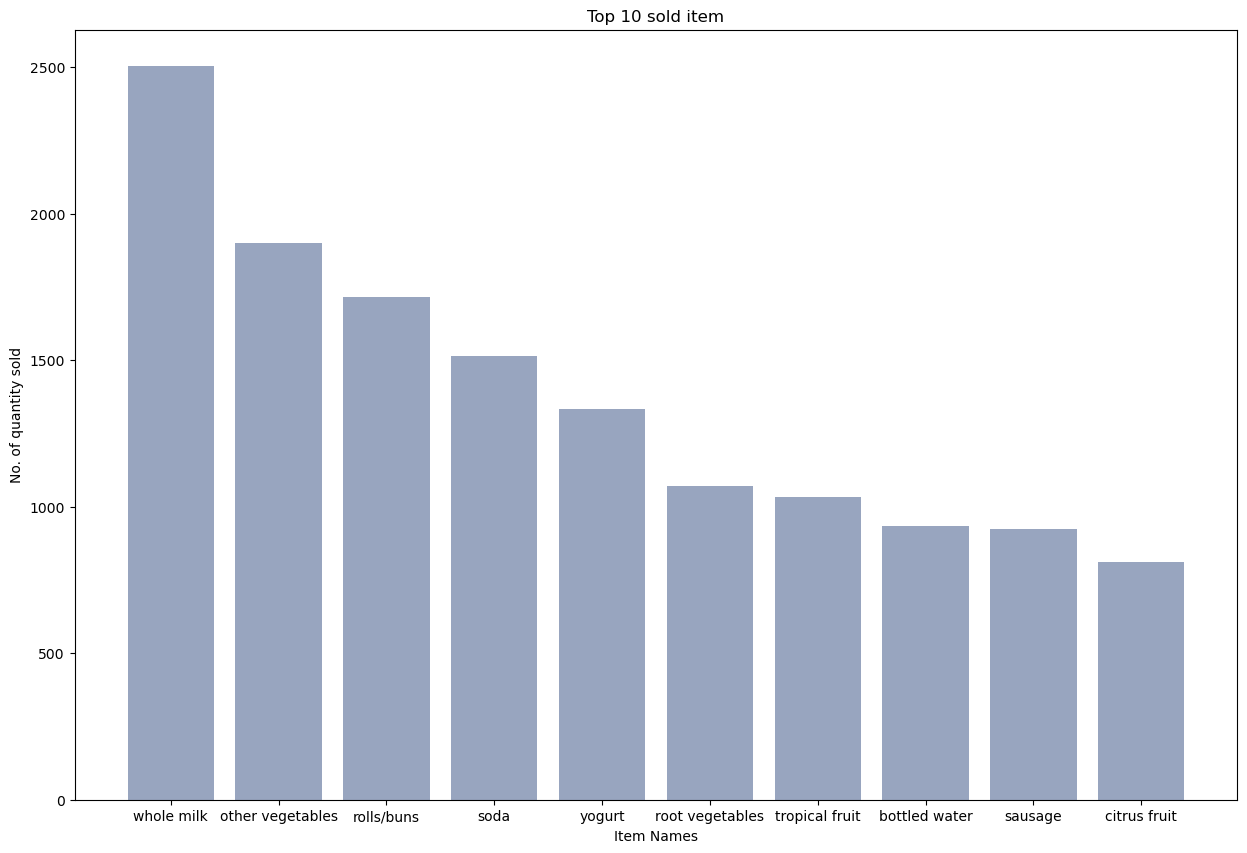

In [36]:
item_dis = df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending = False).head(10)
bar = item_dis['itemDescription']
height = item_dis['Frequency']
x_pos = np.arange(len(bar))
plt.figure(figsize=(15,10))
plt.bar(x_pos,height,color=(0.2,0.3,0.5,0.5))
plt.title('Top 10 sold item')
plt.xlabel('Item Names')
plt.ylabel('No. of quantity sold')
plt.xticks(x_pos, bar);

In [37]:
df_date = df.set_index(['date'])

[Text(0.5, 0, 'date'), Text(0, 0.5, 'Number of item sold')]

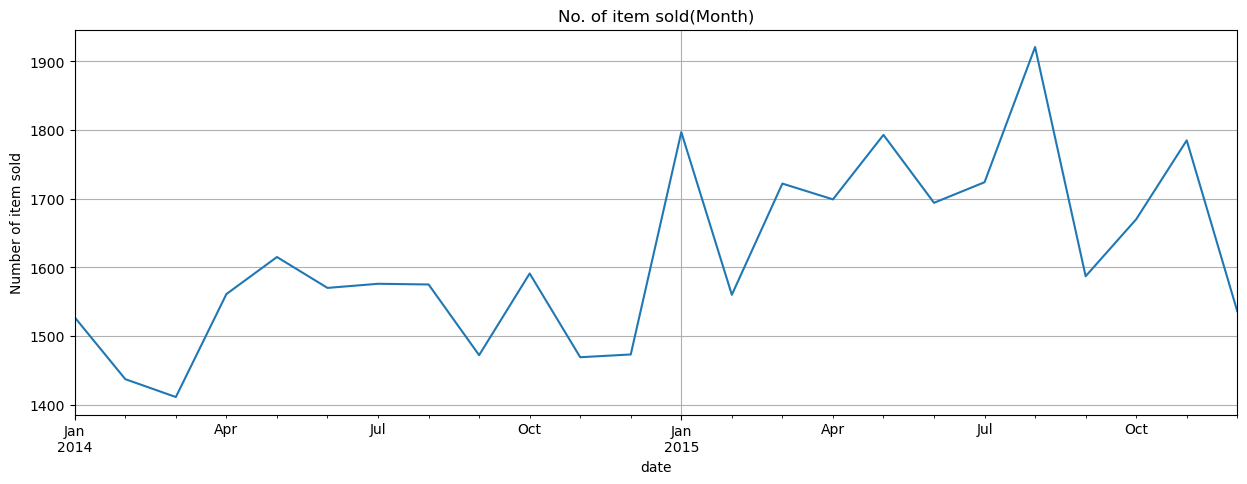

In [38]:
df_date.resample("M")["itemDescription"].count().plot(figsize=(15,5),grid = True, title='No. of item sold(Month)').set(xlabel="date",ylabel="Number of item sold")

In [39]:
cust_level = df[['Member_number','itemDescription']].sort_values(by='Member_number',ascending=False)
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [40]:
transaction = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]

In [41]:
from apyori import apriori
rules = apriori(transactions = transaction,min_support=0.002,min_confidence = 0.05,min_lift=3,min_length=2)

In [42]:
results = list(rules)
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [45]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0]  for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsindf = pd.DataFrame(inspect(results),columns = ['Left Hand Side', 'Right Hand Side', 'Supports', 'Confidence', 'Lifts'])

In [47]:
resultsindf.nlargest(n=10,columns = 'Lifts')

,Left Hand Side,Right Hand Side,Supports,Confidence,Lifts
4915,bottled water,other vegetables,0.002052,0.105263,14.654135
4914,bottled water,other vegetables,0.002052,0.105263,12.068111
2674,oil,other vegetables,0.002052,0.242424,11.524021
3573,citrus fruit,soda,0.002052,0.073394,11.443670
4133,citrus fruit,meat,0.002052,0.148148,11.105413
3290,bottled water,soda,0.002052,0.150943,10.322410
2904,bottled beer,other vegetables,0.002309,0.097826,9.533152
5045,bottled water,other vegetables,0.002052,0.135593,9.438257
2902,bottled beer,pastry,0.002052,0.086957,9.415459
2734,bottled water,shopping bags,0.002309,0.118421,9.232105
